<a href="https://colab.research.google.com/github/sammainahkinya1404/Object-Detection/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# image detection
# Loading Imports
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import datasets, layers,models



In [24]:
# Load datasets
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()


In [25]:
# Normalizing pixels to be btwn 0 and 1
train_images,test_images=train_images/255.0,test_images/255.0

In [26]:
# Class Names
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

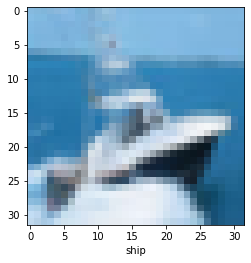

In [27]:
# Visualizing images
IMG_INDEX =8  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [28]:
# CNN Architecture with only Conv2D, and MaxPooling2D()
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [29]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [30]:
# adding Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [33]:
# model compiling
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
# Model Training
Epochs=11
history=model.fit(
    train_images,train_labels,
    epochs=Epochs,
    validation_data=(test_images,test_labels))



Epoch 1/11
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5374 - accuracy: 0.4392 - val_loss: 1.2664 - val_accuracy: 0.5513
Epoch 2/11
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1688 - accuracy: 0.5862 - val_loss: 1.1147 - val_accuracy: 0.6072
Epoch 3/11
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0266 - accuracy: 0.6384 - val_loss: 1.0800 - val_accuracy: 0.6193
Epoch 4/11
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9344 - accuracy: 0.6730 - val_loss: 1.0095 - val_accuracy: 0.6417
Epoch 5/11
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8606 - accuracy: 0.6970 - val_loss: 0.9064 - val_accuracy: 0.6842
Epoch 6/11
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7953 - accuracy: 0.7205 - val_loss: 0.8647 - val_accuracy: 0.7020
Epoch 7/11
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7484 - accuracy: 0.7399 - val_loss: 0.8846 -

In [35]:
# Model Evaluation
test_loss,test_acc=model.evaluate(test_images,test_labels, verbose=2)
print(test_acc)


313/313 - 4s - loss: 0.8747 - accuracy: 0.7044 - 4s/epoch - 12ms/step
0.7044000029563904
